## Load and convince

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
## train_df
train_df = pd.read_csv("../data/train.csv")

In [4]:
print(train_df.shape)
train_df.head()

(4658147, 6)


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [10]:
## number of molecule
train_df.molecule_name.unique().shape

(85003,)

In [5]:
## test_df 
test_df = pd.read_csv("../data/test.csv")
test_df.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [11]:
test_df.molecule_name.unique().shape

(45772,)

In [12]:
## no old molecule in test data
np.intersect1d(train_df.molecule_name.unique(),test_df.molecule_name.unique(),assume_unique=True)

array([], dtype=object)

In [13]:
## the structures
struc = pd.read_csv("../data/structures.csv")
struc.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [19]:
## extra structures
np.intersect1d(struc.molecule_name.unique(),test_df.molecule_name.unique(),assume_unique=True).shape

(45772,)

In [18]:
np.intersect1d(struc.molecule_name.unique(),train_df.molecule_name.unique(),assume_unique=True).shape

(85003,)

In [23]:
## sample solution
samp = pd.read_csv('../data/sample_submission.csv')
samp.head()

,id,scalar_coupling_constant
0,4658147,0
1,4658148,0
2,4658149,0
3,4658150,0
4,4658151,0


## Check features

In [26]:
## how many bound type it has 
train_df.type.value_counts()
## large enough for training

3JHC    1510379
2JHC    1140674
1JHC     709416
3JHH     590611
2JHH     378036
3JHN     166415
2JHN     119253
1JHN      43363
Name: type, dtype: int64

(array([4.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00,
        1.10000e+01, 3.00000e+00, 8.00000e+00, 1.90000e+01, 4.00000e+01,
        9.30000e+01, 2.81000e+02, 4.58000e+02, 7.42000e+02, 1.34400e+03,
        4.18800e+03, 9.09100e+03, 1.39490e+04, 7.04600e+03, 5.17730e+04,
        1.47391e+05, 5.15470e+04, 3.39830e+04, 2.05250e+04, 2.58040e+04,
        4.42200e+04, 8.25330e+04, 1.18588e+05, 2.48422e+05, 3.97993e+05,
        5.89260e+05, 5.13201e+05, 4.11023e+05, 2.82974e+05, 2.25368e+05,
        1.83129e+05, 1.48434e+05, 9.97270e+04, 6.72030e+04, 5.21910e+04,
        3.69770e+04, 1.10410e+04, 2.98700e+03, 2.14300e+03, 3.85200e+03,
        3.79700e+03, 1.98900e+03, 2.95000e+02, 4.80000e+02, 5.79000e+02,
        7.02000e+02, 8.17000e+02, 1.03000e+03, 1.35800e+03, 1.86500e+03,
        2.34900e+03, 1.91900e+03, 2.23300e+03, 3.11100e+03, 2.84300e+03,
        1.95000e+03, 1.55400e+03, 1.48200e+03, 1.22500e+03, 9.76000e+02,
        8.89000e+02, 1.05800e+03, 1.09400e+03, 1.09

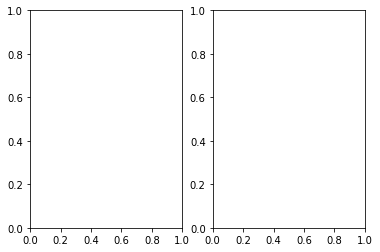

In [38]:
aes, fig = plt.subplots(1,2)
axs[1].hist(train_df.scalar_coupling_constant,bins=200)
# majorly two cluster of coefficient